<a href="https://colab.research.google.com/github/jcmachicao/curso_intro_nn/blob/main/nn_demo_ecuacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Cursos Machine Learning**
# **Demostración de Redes Neuronales para Ecuación Simple**
---
### **Introducción a Redes Neuronales**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2022

In [ ]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [ ]:
# genera un tensor como arreglo entre -10 y 10, con paso 0.02
tensor_1 = torch.arange(-10, 10, 0.02)
# imprime la forma del tensor
tensor_1.shape

torch.Size([1000])

In [ ]:
X_or = torch.unsqueeze(tensor_1, dim=1)
X_or.shape

torch.Size([1000, 1])

In [ ]:
torch.manual_seed(42)
y_or = torch.sin(X_or) + 0.25*torch.randn(X_or.size())

In [ ]:
X_or.size()

torch.Size([1000, 1])

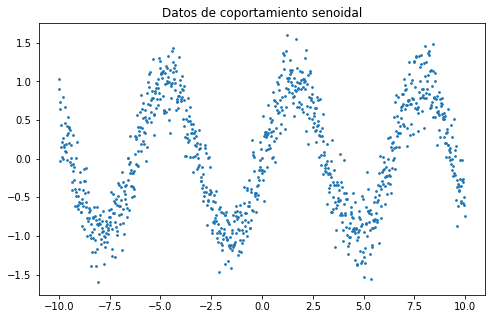

In [ ]:
_, ax = plt.subplots(1, 1, figsize=(8, 5), facecolor='white')
ax.scatter(X_or, y_or, s=3)
ax.set_title('Datos de coportamiento senoidal')
plt.show()

In [ ]:
model_0 = torch.nn.Sequential(
    torch.nn.Linear(1, 200),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(200, 1)
)

In [ ]:
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001, momentum=0)
criterion = torch.nn.MSELoss()

In [ ]:
resul = []

In [ ]:
epochs = 10000
for epo in range(epochs):
  optimizer.zero_grad()
  y_pred = model_0(X_or)     #y predicho
  loss = criterion(y_pred, y_or)   #perdida
  loss.backward()
  optimizer.step()
  if epo % (epochs/10) == 0:
    print(epo, loss.item())
    resul.append([epo, loss.item()])

0 1.9955275058746338
1000 0.4845679700374603
2000 0.4528673589229584
3000 0.4230634570121765
4000 0.3945114314556122
5000 0.3687441945075989
6000 0.34679633378982544
7000 0.3284580111503601
8000 0.31306710839271545
9000 0.30016010999679565


In [ ]:
X_np = X_or.numpy()
y_np = y_or.numpy()
y_pred_np = y_pred.data.numpy()

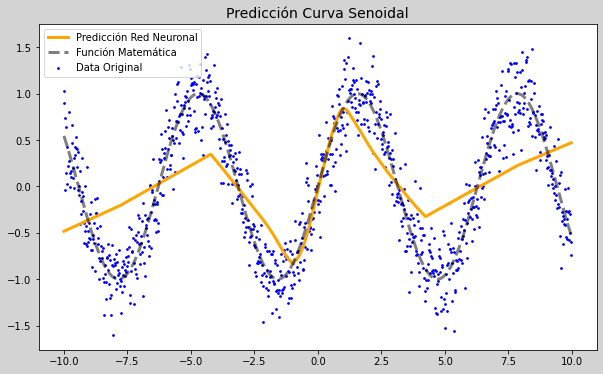

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='lightgray')
ax.scatter(X_or, y_or, s=3, c='blue', label='Data Original')
ax.plot(X_np, y_pred_np, c='orange', lw=3, label='Predicción Red Neuronal')
ax.plot(X_or, torch.sin(X_or), c='k', linestyle='dashed', lw=3, alpha=0.5, label='Función Matemática')
plt.legend(loc='best')
plt.title('Predicción Curva Senoidal', fontsize=14)
plt.show()

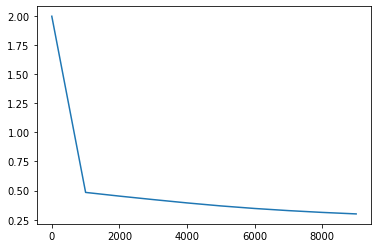

In [ ]:
resul_df = pd.DataFrame(resul)
resul_df.columns = ['epoca', 'perdida']
plt.plot(resul_df.epoca, resul_df.perdida)
plt.show()